In [1]:
import os
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# ploting settings
plt.style.use("~/projects/CELL_LINEAGE/NOTES/Plot/sloth_paper.mplstyle")
os.environ["QT_QPA_PLATFORM"] = "offscreen"

%config InlineBackend.figure_format = "svg"
%matplotlib inline

In [3]:
NPG_WIDTH2 = 183 / 25.4
NPG_WIDTH = 89 / 25.4
NPG_HEIGHT = 247 / 25.4
GOLDEN_RATIO = (1 + 5 ** 0.5) / 2

In [4]:
DATA_DIR = Path("./AlexanderOudenaarden_Data/")

In [7]:
def get_organ_corr(filename):
    df = pd.read_csv(DATA_DIR / filename, sep="\t")
    # annotate cell type info
    df["Organ"] = df.iloc[:, 0].str.split("-", 2).str[2].str.rsplit("-", 1).str[0]
    # filter mutated reads
    df = df[df["720M"] < 100]
    print(df.shape)
    df = df.drop(columns=["720M", "hclust"])
    # bootstrap sampling
    df_mean = df.groupby("Organ").apply(lambda x: x.sample(frac=0.5).mean())
    df_corr = df_mean.T.corr().stack()
    df_corr = df_corr[[x for x in set((map(lambda x: tuple(sorted(x)), df_corr.index.to_list()))) if x[0] != x[1] and x[0] != "wkm" and x[1] != "wkm"]]
    R1_corr = df_corr ** 2
    return R1_corr

get_organ_corr("R1_scarclones.txt")

(3125, 86)


Organ      Organ    
for        left-mid     0.649492
left-mid   right-eye    0.855826
for        left-eye     0.809456
           hind         0.723457
hind       right-mid    0.742940
           right-eye    0.890912
left-eye   left-mid     0.769963
for        right-mid    0.605403
hind       left-mid     0.878199
left-eye   right-eye    0.859124
right-eye  right-mid    0.703640
left-eye   right-mid    0.680398
left-mid   right-mid    0.669524
for        right-eye    0.743204
hind       left-eye     0.873353
dtype: float64

(3125, 86)
(3125, 86)


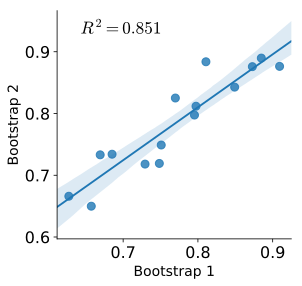

In [9]:
def plot_similarity_corr(s1, s2):
    sns.regplot(s1, s2, ax=ax)
    r2 = np.corrcoef(s1, s2)[1, 0] ** 2
    ax.text(0.1, 0.9, f"$R^2={{{r2:0.3}}}$", fontsize="xx-large", transform=ax.transAxes)
    #ax.set_xlabel("Organ similarity ($R^2$ in fish R2)")
    #ax.set_ylabel("Organ similarity ($R^2$ in fish R3)")
    ax.set_xlabel("Bootstrap 1")
    ax.set_ylabel("Bootstrap 2")
    sns.despine()

fig, ax = plt.subplots(figsize=(NPG_WIDTH * 1.2, NPG_WIDTH * 1.2))
plot_similarity_corr(get_organ_corr("R1_scarclones.txt"), get_organ_corr("R1_scarclones.txt"))
fig.show()